Se importan las librerias que se va a utilizar en el codigo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Traer los registros del data set y almacenarlos en df

In [2]:
ds_url = "https://raw.githubusercontent.com/catalinafs/Data_analytics/main/Volumen_de_solicitudes_de_visa_colombiana_recibidas_desde_2017_20250325.csv"
dataframe = pd.read_csv(ds_url, low_memory=False)
dataframe

,Año Solicitud,Nacionalidad,Sexo,Fecha de Nacimiento,Vocación de permanencia,Número
0,2017,ECUATORIANA,FEMENINO,24/07/1897,Con vocación de permanencia,2
1,2017,FEDERACION DE RUSIA,FEMENINO,03/05/1919,Sin vocación de permanencia,2
2,2017,FRANCESA,FEMENINO,20/08/1919,Sin vocación de permanencia,1
3,2017,CUBANA,FEMENINO,03/02/1922,Sin vocación de permanencia,2
4,2017,ESTADOUNIDENSE,FEMENINO,17/11/1922,Sin vocación de permanencia,1
...,...,...,...,...,...,...
349578,2024,ESPAÑOLA,MASCULINO,11/03/2024,Con vocación de permanencia,2
349579,2024,AZERBAIYANA,MASCULINO,06/04/2024,Sin vocación de permanencia,1
349580,2024,CHINA,MASCULINO,08/04/2024,Sin vocación de permanencia,1
349581,2024,ESTADOUNIDENSE,MASCULINO,06/05/2024,Sin vocación de permanencia,2


No se requirio seleccionar columnas especificas, pero si se tuvo que cambiar el nombre de las columnas para que la información sea mas clara.

In [3]:
dataframe.columns = ['Año_Solicitud', 'Nacionalidad', 'Sexo', 'Fecha_de_Nacimiento', 'Vocacion_Permanencia', 'Numero_de_Visas']
dataframe

,Año_Solicitud,Nacionalidad,Sexo,Fecha_de_Nacimiento,Vocacion_Permanencia,Numero_de_Visas
0,2017,ECUATORIANA,FEMENINO,24/07/1897,Con vocación de permanencia,2
1,2017,FEDERACION DE RUSIA,FEMENINO,03/05/1919,Sin vocación de permanencia,2
2,2017,FRANCESA,FEMENINO,20/08/1919,Sin vocación de permanencia,1
3,2017,CUBANA,FEMENINO,03/02/1922,Sin vocación de permanencia,2
4,2017,ESTADOUNIDENSE,FEMENINO,17/11/1922,Sin vocación de permanencia,1
...,...,...,...,...,...,...
349578,2024,ESPAÑOLA,MASCULINO,11/03/2024,Con vocación de permanencia,2
349579,2024,AZERBAIYANA,MASCULINO,06/04/2024,Sin vocación de permanencia,1
349580,2024,CHINA,MASCULINO,08/04/2024,Sin vocación de permanencia,1
349581,2024,ESTADOUNIDENSE,MASCULINO,06/05/2024,Sin vocación de permanencia,2


## Perfil 1 - Departamento de Migración (Política migratoria y control fronterizo)
Este perfil corresponde a académicos, analistas o funcionarios que estudian tendencias migratorias.

- **Pregunta #1** - ¿Cuáles son los países con más solicitantes de visa para Colombia?
- **Pregunta #2** - ¿Existe una diferencia significativa en la cantidad de solicitudes según el sexo del solicitante?

**Grafica de la Pregunta #1**



<ipython-input-4-fb3815a60474>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Número de Solicitudes', y='Nacionalidad', data=top_paises, palette='viridis')


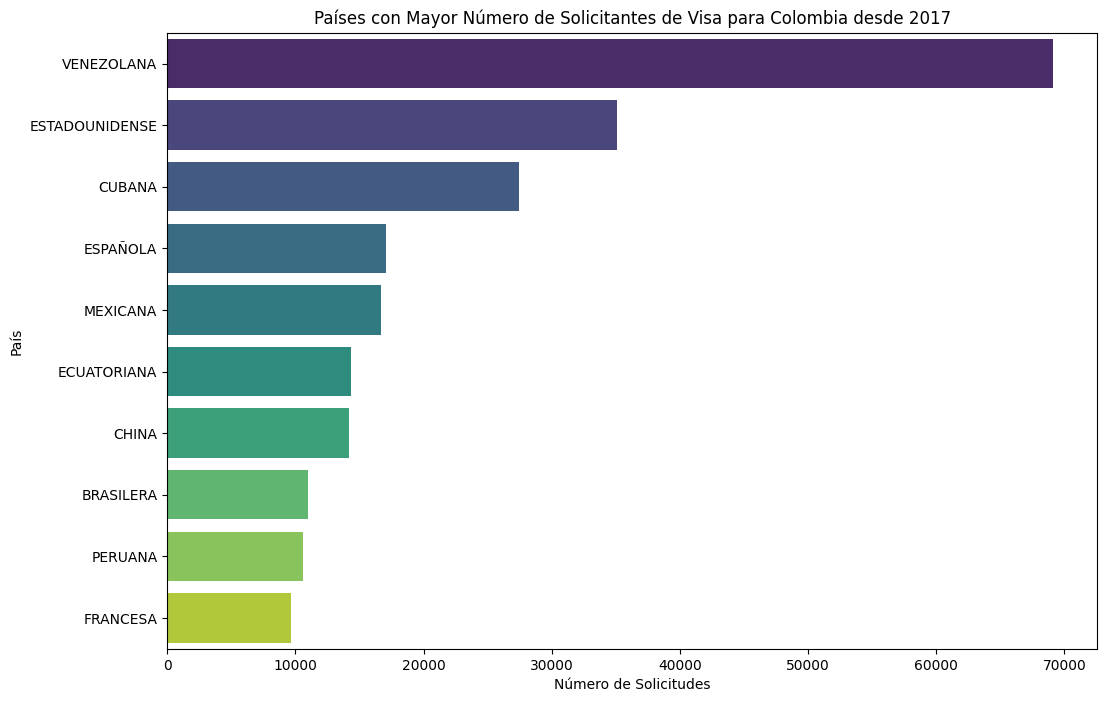

In [4]:
# Se agrupa y cuenta las solicitudes por país
solicitudes_por_pais = dataframe.groupby('Nacionalidad').size().reset_index(name='Número de Solicitudes')
# Ordena de forma descendente y selecciona los países con más solicitudes
top_paises = solicitudes_por_pais.sort_values(by='Número de Solicitudes', ascending=False).head(10)

# Se utiliza la libreria de 'matplotlib' y 'seaborn' para crear el grafico que muestre los datos
plt.figure(figsize=(12, 8))
sns.barplot(x='Número de Solicitudes', y='Nacionalidad', data=top_paises, palette='viridis')
plt.title('Países con Mayor Número de Solicitantes de Visa para Colombia desde 2017')
plt.xlabel('Número de Solicitudes')
plt.ylabel('País')
plt.show()


**Grafica de la Pregunta #2**

<ipython-input-5-24a262806898>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sexo', y='Número de Solicitudes', data=solicitudes_por_sexo, palette='pastel')


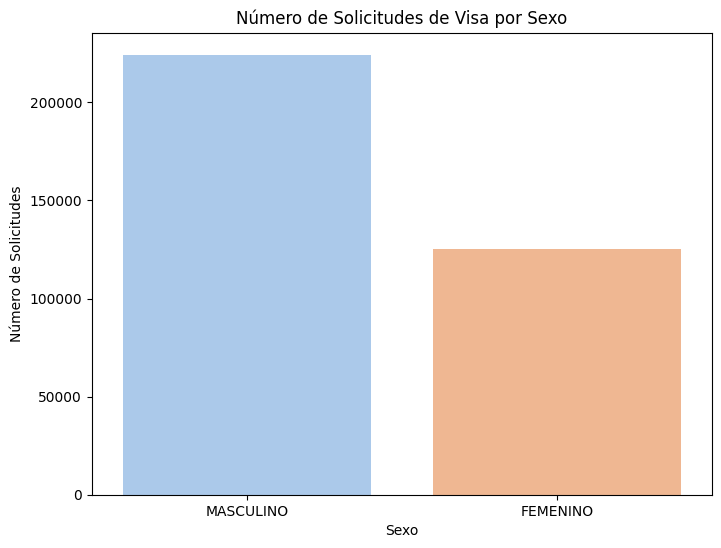

In [5]:
# Contar la solicitudes por sexo
solicitudes_por_sexo = dataframe['Sexo'].value_counts().reset_index()
# Se renombran las columnas
solicitudes_por_sexo.columns = ['Sexo', 'Número de Solicitudes']

# Se configura la grafica para que muestre los datos deseados
plt.figure(figsize=(8, 6))
sns.barplot(x='Sexo', y='Número de Solicitudes', data=solicitudes_por_sexo, palette='pastel')
plt.title('Número de Solicitudes de Visa por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Solicitudes')
# Se renombran las columnas para dejarlas como estaban antes
solicitudes_por_sexo.columns = ['Sexo', 'Numero_de_Visas']
# Se muestra la grafica
plt.show()

## Perfil 2 - Reclutador de Talento Internacional
Empresas que buscan contratar talento extranjero o gestionar movilidad laboral.

- **Pregunta #1** - ¿Cuáles son los años con mayor crecimiento en solicitudes de visa con vocación de permanencia?
- **Pregunta #2** - ¿Qué edad promedio tienen los solicitantes de visa con vocación de permanencia?

**Grafica de la Pregunta #1**

<ipython-input-74-0c7ccba13c2f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crecimiento_anual.index, y=crecimiento_anual.values, palette='coolwarm')


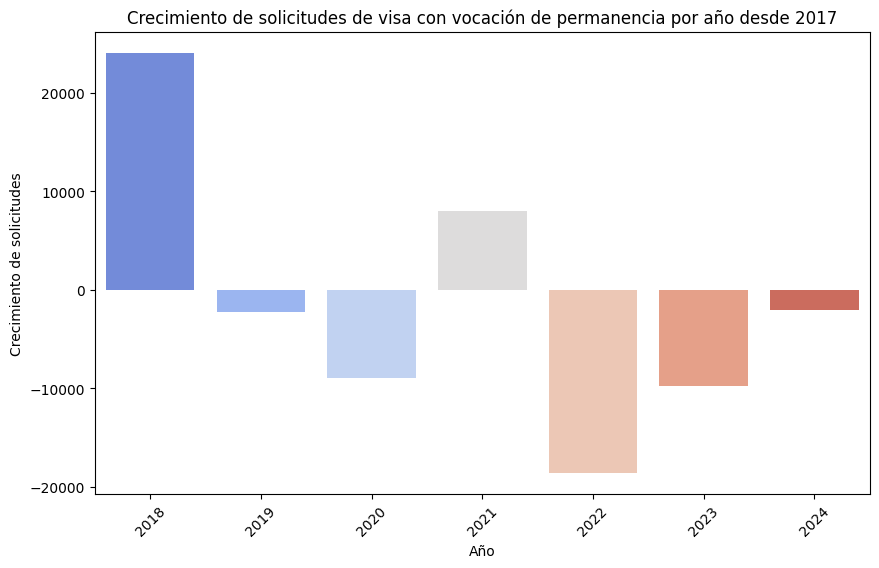

In [74]:
# Se filtra solo las solicitudes de visa que tengan vocacion de permanencia
df_permanencia = dataframe[dataframe['Vocacion_Permanencia'] == 'Con vocación de permanencia']
# Se cuentan las solicitudes que hubo en cada año
solicitudes_por_año = df_permanencia['Año_Solicitud'].value_counts().sort_index()
# Se calcula el crecimiento anual
crecimiento_anual = solicitudes_por_año.diff().dropna()

# Se configura la grafica para mostrar el crecimiento que hubo
plt.figure(figsize=(10, 6))
sns.barplot(x=crecimiento_anual.index, y=crecimiento_anual.values, palette='coolwarm')
plt.title("Crecimiento de solicitudes de visa con vocación de permanencia por año desde 2017")
plt.xlabel("Año")
plt.ylabel("Crecimiento de solicitudes")
plt.xticks(rotation=45)
plt.show()


**Grafica de la Pregunta #2**

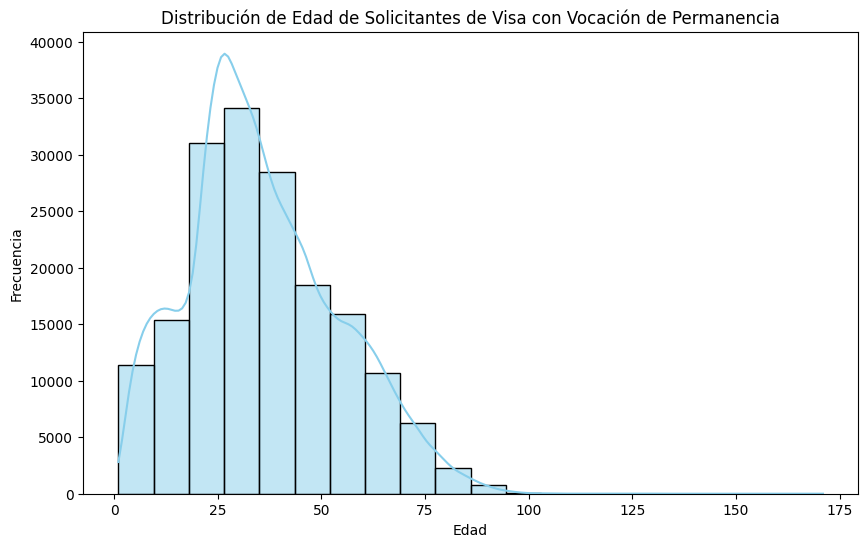

In [16]:
# Se utiliza la libreria 'datetime' para poder calcular la edad
from datetime import datetime

# Se convertir la columna a formato de fecha
dataframe['Fecha_de_Nacimiento'] = pd.to_datetime(dataframe['Fecha_de_Nacimiento'], format='%d/%m/%Y', errors='coerce')

# Se calcular la edad en años
dataframe['Edad'] = datetime.now().year - dataframe['Fecha_de_Nacimiento'].dt.year

# Se filtran los datos nada mas con las solicitudes que tengan vocacion de permanencia
df_permanencia = dataframe[dataframe['Vocacion_Permanencia'] == 'Con vocación de permanencia']

# Se calcula el promedio de edades
edad_promedio = df_permanencia['Edad'].mean()

# Se configura la grafica para mostrar la distribucion de las edades
plt.figure(figsize=(10, 6))
sns.histplot(df_permanencia['Edad'].dropna(), bins=20, kde=True, color="skyblue")
plt.title("Distribución de Edad de Solicitantes de Visa con Vocación de Permanencia")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

## Perfil 3 - Periodista en Medios de Comunicación
Interesado en informar sobre tendencias migratorias en Colombia.

- **Pregunta #1** - ¿Cuántas solicitudes de visa se han registrado anualmente en Colombia desde el 2017?
- **Pregunta #2** - ¿Qué porcentaje del total de solicitudes corresponde a cada nacionalidad?

**Grafica de la Pregunta #1**

<ipython-input-17-e3878021209b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=solicitudes_por_año.index, y=solicitudes_por_año.values, palette='Blues')


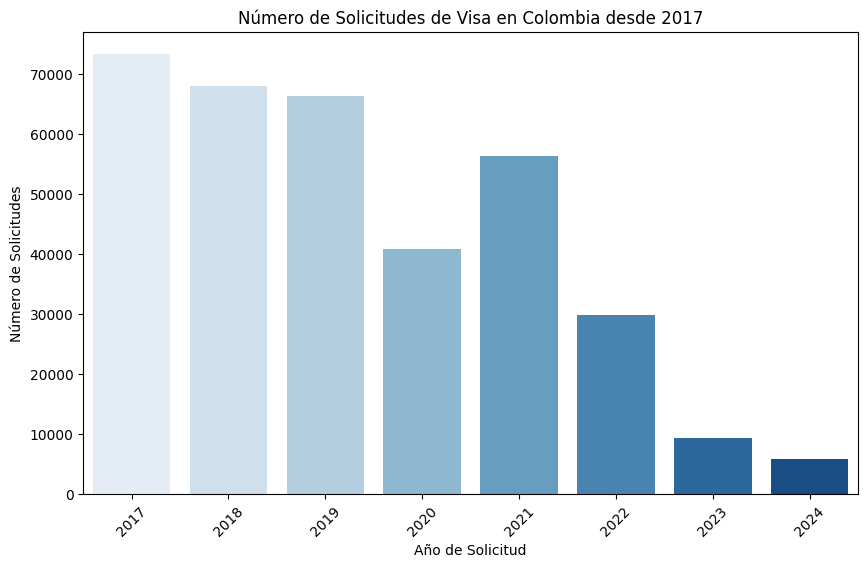

In [17]:
# Se filtran las solicitudes por año desde el 2017 en adelante
df_2017 = dataframe[dataframe['Año_Solicitud'] >= 2017]

# Se cuentan las solicitudes por año
solicitudes_por_año = df_2017['Año_Solicitud'].value_counts().sort_index()

# Se configura la grafica para que muestre las solicitudes por año
plt.figure(figsize=(10, 6))
sns.barplot(x=solicitudes_por_año.index, y=solicitudes_por_año.values, palette='Blues')
plt.title("Número de Solicitudes de Visa en Colombia desde 2017")
plt.xlabel("Año de Solicitud")
plt.ylabel("Número de Solicitudes")
plt.xticks(rotation=45)
plt.show()

**Grafica de la Pregunta #2**

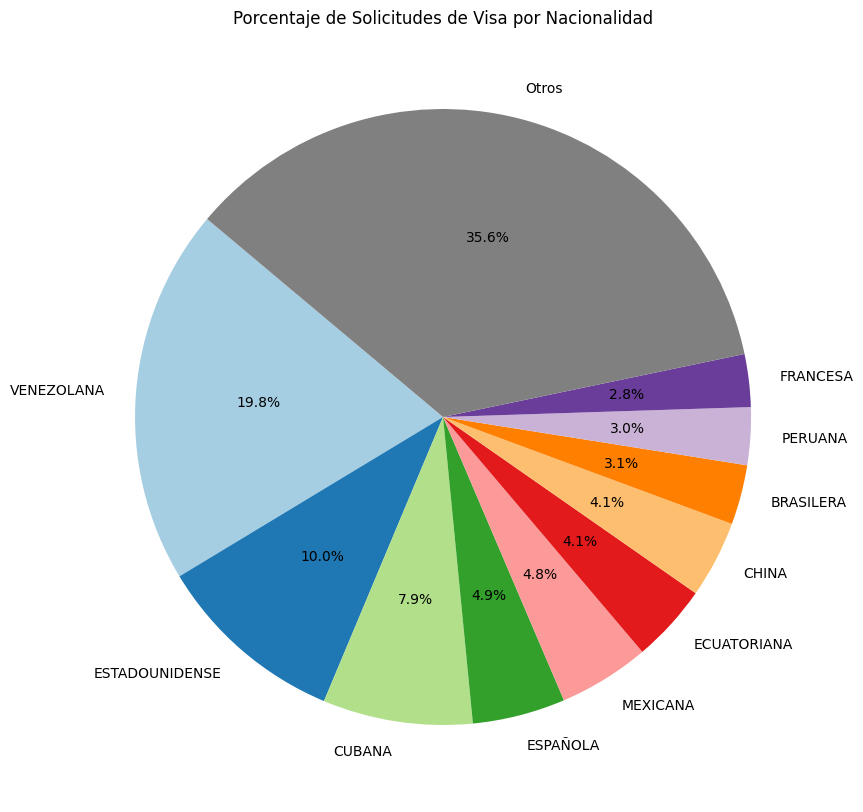

In [25]:
# Contar solicitudes por nacionalidad
solicitudes_por_pais = dataframe['Nacionalidad'].value_counts()

# Calcular el porcentaje
porcentaje_paises = (solicitudes_por_pais / solicitudes_por_pais.sum()) * 100

# Seleccionar el Top 10
top_10_paises = porcentaje_paises[:10]

# Calcular el porcentaje del resto de los países
otros_porcentaje = porcentaje_paises[10:].sum()

# Crear listas de datos para el gráfico
labels = list(top_10_paises.index) + ["Otros"]
sizes = list(top_10_paises.values) + [otros_porcentaje]

# Colores para la gráfica, color gris para "otros"
colors = plt.cm.Paired.colors[:10] + ("gray",)

# Configurar la grafica para mostrar los porcentajes en el Pie Chart
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Porcentaje de Solicitudes de Visa por Nacionalidad")
plt.show()